--------------


# Dynamic Insights: Exploring Earnings & Game Genres in Esports (1998 - 2023) 🎮📈

----------------

In the rapidly evolving landscape of digital entertainment, a new phenomenon has emerged that has captured the attention and passion of millions worldwide: Esports. Short for "electronic sports," Esports refers to competitive video gaming, where skilled players or teams face off against each other in virtual arenas, competing for victory, glory, and significant monetary rewards. Unlike traditional sports, Esports leverages the power of cutting-edge technology and the internet to create a captivating and fast-paced competitive environment that transcends geographical boundaries.

Over the past few decades, Esports has evolved from a niche hobby among gaming enthusiasts into a global cultural phenomenon with a massive following.

In this ever-evolving digital age, Esports stands at the forefront of innovation, pushing the boundaries of what is possible in the world of gaming and competitive entertainment. Its meteoric rise has captured the imagination of a generation, and its future is bound to be bright, promising even more thrilling competitions, larger audiences, and an enduring legacy in the annals of entertainment history.


----------------


This project aims to conduct an exploratory data analysis (EDA) of the Esports industry, focusing on earnings and game genres. The objective is to unveil insightful trends and findings, shedding light on the dynamic and rapidly growing world of competitive gaming. The dataset at hand comprises comprehensive data, rankings, and historical information on earnings in the Esports industry, making it a valuable resource. Nonetheless, it is essential to acknowledge that the reliance on reported data from the site might pose potential limitations concerning its absolute reliability. Despite this, the study holds significant potential in providing valuable insights into the financial aspects of Esports.

----------


The dataset is from EsportsEarnings.com

The dataset contains two tables

1. "Games" - It contains information about games with 7 features

* Game: The name of the game.
* ReleaseDate: The year when the game was released.
* Genre: Genre of the game.
* TotalEarnings: The total earnings of the game in US dollars.
* OnlineEarnings: The earnings of the game through online in US dollars.
* TotalPlayers: The total number of players of the game.
* TotalTournaments: The total number of tournaments held for the game.

2. "Earnings" - It contains information about tournaments with 5 features

* Date: The date when the tournaments took place.
* Game: The name of the game associated with the tournaments.
* Earnings: The earnings from the tournaments.
* Players: The number of players who participated in the tournaments.
* Tournament: The number of tournaments held for the game on that specific date.

------------------------

### Importing Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fast')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load and inspect the data
games = pd.read_csv('/kaggle/input/esports-earnings/GeneralEsportData.csv')
earning = pd.read_csv('/kaggle/input/esports-earnings/HistoricalEsportData.csv')

In [3]:
games.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,468939.32,339093.45,437,232
1,Age of Empires II,1999,Strategy,3171415.06,1130300.41,1936,1532
2,Age of Empires III,2005,Strategy,114643.65,41800.00,160,143
3,Age of Empires IV,2021,Strategy,933523.68,409117.93,524,297
4,Age of Empires Online,2011,Strategy,9346.56,775.00,42,44


In [4]:
earning.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-05-01,QuakeWorld,300.0,3,1
3,1998-07-01,Quake II,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


--------------------

### Data Wrangling and Cleaning

In [5]:
#summary of dataframe

games.info()
print("-------------------")
earning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              637 non-null    object 
 1   ReleaseDate       637 non-null    int64  
 2   Genre             637 non-null    object 
 3   TotalEarnings     637 non-null    float64
 4   OnlineEarnings    637 non-null    float64
 5   TotalPlayers      637 non-null    int64  
 6   TotalTournaments  637 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 35.0+ KB
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8891 entries, 0 to 8890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8891 non-null   object 
 1   Game         8891 non-null   object 
 2   Earnings     8891 non-null   float64
 3   Players      8891 non-null   int64  
 4   Tournaments  8891 non-null 

We can see there are no missing columns in the dataset and it seems there is no need to change anything in data.

But to make sure we will check again if it is having any missing values

In [6]:
print(games.isnull().sum())
print("------------")
print(earning.isnull().sum())

Game                0
ReleaseDate         0
Genre               0
TotalEarnings       0
OnlineEarnings      0
TotalPlayers        0
TotalTournaments    0
dtype: int64
------------
Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64


In [7]:
#checking the numerical columns
games.describe()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
count,637.000000,6.370000e+02,6.370000e+02,637.000000,637.000000
mean,2012.466248,2.415454e+06,1.691805e+06,221.259027,91.874411
std,7.363061,1.682704e+07,1.319057e+07,939.464546,467.223419
min,1981.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2007.000000,1.000000e+03,0.000000e+00,4.000000,1.000000
50%,2015.000000,3.220846e+04,1.134095e+04,20.000000,5.000000
75%,2018.000000,2.481008e+05,1.474739e+05,98.000000,27.000000
max,2023.000000,3.192446e+08,2.821300e+08,15894.000000,7105.000000


In [8]:
earning.describe()

,Earnings,Players,Tournaments
count,8.891000e+03,8891.000000,8891.000000
mean,1.751357e+05,59.057361,6.601057
std,1.016232e+06,128.634142,11.995499
min,0.000000e+00,0.000000,1.000000
25%,1.035000e+03,6.000000,1.000000
50%,1.000000e+04,16.000000,2.000000
75%,6.896561e+04,50.000000,6.000000
max,4.013865e+07,1719.000000,172.000000


In [9]:
#adding a year column to the dataframe
earning["Year"] = pd.DatetimeIndex(earning["Date"]).year
earning.head()

,Date,Game,Earnings,Players,Tournaments,Year
0,1998-01-01,QuakeWorld,15000.0,8,1,1998
1,1998-05-01,Quake II,14600.0,4,1,1998
2,1998-05-01,QuakeWorld,300.0,3,1,1998
3,1998-07-01,Quake II,6500.0,4,1,1998
4,1998-11-01,Quake II,36600.0,13,2,1998


In [10]:
games.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,468939.32,339093.45,437,232
1,Age of Empires II,1999,Strategy,3171415.06,1130300.41,1936,1532
2,Age of Empires III,2005,Strategy,114643.65,41800.00,160,143
3,Age of Empires IV,2021,Strategy,933523.68,409117.93,524,297
4,Age of Empires Online,2011,Strategy,9346.56,775.00,42,44


In [11]:
#checking the number and type of genres
len(games['Genre'].unique())
games['Genre'].unique()

array(['Strategy', 'First-Person Shooter',
       'Multiplayer Online Battle Arena', 'Role-Playing Game',
       'Fighting Game', 'Racing', 'Sports', 'Collectible Card Game',
       'Puzzle Game', 'Battle Royale', 'Third-Person Shooter',
       'Music / Rhythm Game'], dtype=object)

In [12]:
# Changing the names so it won't be too long 
games = games.apply(lambda x: x.replace({'Multiplayer Online Battle Arena':'MOBA', 'Third-Person Shooter':'TPS', "Role-Playing": 'RPG', "First-Person Shooter": "FPS"}, regex=True))


In [13]:
games['Genre'].unique()

array(['Strategy', 'FPS', 'MOBA', 'RPG Game', 'Fighting Game', 'Racing',
       'Sports', 'Collectible Card Game', 'Puzzle Game', 'Battle Royale',
       'TPS', 'Music / Rhythm Game'], dtype=object)

Now lets combine the two datasets into one so we can eliminate unwanted features.

In [14]:
# Joining the Datasets into one 
games_earning = earning.merge(games[['Game','Genre','ReleaseDate']], how = 'left', on = 'Game')


In [15]:
games_earning.head(10)

,Date,Game,Earnings,Players,Tournaments,Year,Genre,ReleaseDate
0,1998-01-01,QuakeWorld,15000.0,8,1,1998,FPS,1996
1,1998-05-01,Quake II,14600.0,4,1,1998,FPS,1997
2,1998-05-01,QuakeWorld,300.0,3,1,1998,FPS,1996
3,1998-07-01,Quake II,6500.0,4,1,1998,FPS,1997
4,1998-11-01,Quake II,36600.0,13,2,1998,FPS,1997
5,1998-11-01,QuakeWorld,22000.0,0,1,1998,FPS,1996
6,1998-11-01,StarCraft: Brood War,20000.0,8,1,1998,Strategy,1998
7,1998-12-01,Age of Empires,2000.0,1,1,1998,Strategy,1997
8,1999-03-01,Quake II,15000.0,5,1,1999,FPS,1997
9,1999-04-01,StarCraft: Brood War,3000.0,2,1,1999,Strategy,1998


In [16]:
# Creating a Dictionary for popular games using their more familiar names 
replace_names_dict = {
    "PLAYERUNKNOWN'S BATTLEGROUNDS Mobile": 'PUBG mobile',
    "PLAYERUNKNOWN’S BATTLEGROUNDS": 'PUBG',
    "Counter-Strike: Global Offensive": 'Counter-Strike'
}

# Replacing values from the Dictionary in the Dataset
games_earning['Game'] = games_earning['Game'].replace(replace_names_dict)

Let's just drop the rows that have zero earnings or zero players

In [17]:
# Filtering the rows 
games_earning = games_earning.loc[(games_earning["Earnings"]>0) & (games_earning["Players"]>0) ]

In [18]:
# Creating a Pivot table 
games_earning_pivot = pd.DataFrame()
games_earning_pivot = pd.pivot_table(games_earning, values = ['Genre', 'Players', 'Tournaments', 'Earnings','ReleaseDate'],\
                                     index = ['Game', 'Year'], aggfunc = {'Genre': 'first', 'Players' : 'sum', 'Tournaments':'sum', 'Earnings':'sum', 'ReleaseDate':'first'})
games_earning_pivot.reset_index(inplace=True)

games_earning_pivot.head(10)

,Game,Year,Earnings,Genre,Players,ReleaseDate,Tournaments
0,ARMS,2017,3392.10,Fighting Game,47,2017,19
1,ARMS,2018,13073.14,Fighting Game,161,2017,56
2,ARMS,2019,2470.86,Fighting Game,54,2017,14
3,ARMS,2020,2057.30,Fighting Game,46,2017,11
4,ARMS,2021,1176.50,Fighting Game,24,2017,7
5,ARMS,2022,200.00,Fighting Game,6,2017,2
6,Acceleration of SUGURI 2,2019,210.00,Fighting Game,3,2018,1
7,Acceleration of SUGURI 2,2020,100.00,Fighting Game,3,2018,1
8,Acceleration of SUGURI 2,2021,100.00,Fighting Game,3,2018,1
9,After-H,2021,15049.26,FPS,57,2019,4


--------------------

### Exploratory Data Analysis

In this section I will try to reveal some insights and trends in earnings, tournaments and popularity of games/genres in the eSports industry.

#### Total earnings in the last 10 years 

First, let's see how much money (in USD) Esports made in the last ten years.

In [19]:
# Calculating earnings by year
earning_by_year = games_earning_pivot[['Earnings', 'Year']].groupby('Year').sum()

# Converting earnings to millions and data type to integer
earning_by_year['Earnings'] = round(earning_by_year['Earnings']/1000000)
earning_by_year['Earnings'] = earning_by_year['Earnings'].astype(int)
earning_by_year.reset_index(inplace=True)

# Filter by the years 2013 to 2022
filter_earning_by_year = earning_by_year[(earning_by_year['Year'] >= 2013) & (earning_by_year['Year'] <= 2022)]

In [20]:
print(earning_by_year)

    Year  Earnings
0   1998         0
1   1999         0
2   2000         1
3   2001         1
4   2002         1
5   2003         2
6   2004         3
7   2005         4
8   2006         6
9   2007         7
10  2008         8
11  2009         4
12  2010         6
13  2011        11
14  2012        14
15  2013        23
16  2014        38
17  2015        68
18  2016        99
19  2017       120
20  2018       171
21  2019       254
22  2020       144
23  2021       251
24  2022       251
25  2023        68


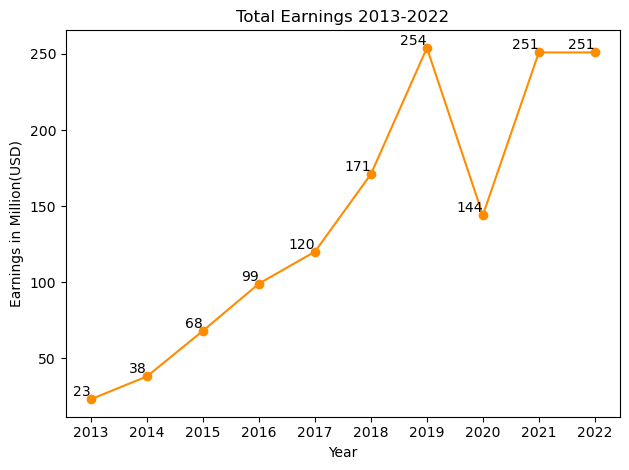

In [21]:
# Making a line plot

fig, ax = plt.subplots()
plt.plot(filter_earning_by_year['Year'], filter_earning_by_year['Earnings'], marker = 'o', color='darkorange')
ax.set_xlabel('Years')
ax.set_ylabel('Earnings')
plt.xticks(filter_earning_by_year['Year'], filter_earning_by_year['Year'])

for x, y in zip(filter_earning_by_year['Year'], filter_earning_by_year['Earnings']):
    plt.text(x, y, f'{y}', ha='right', va='bottom')

plt.title('Total Earnings 2013-2022')
plt.xlabel('Year')
plt.ylabel('Earnings in Million(USD)')
plt.tight_layout()
    
plt.show()

As we can see in the line plot, the total earnings of the industry were **growing every year, and in the year 2019, it reached a peak of $253M (11 times more than the year 2013!)**

We can also observe a decrease in the year **2020**, which can be attributed to the global impact of the **COVID-19** pandemic, affecting numerous industries. However, in the two years post-pandemic, we can see a recovery in earnings, and I believe that it will continue to grow even more in the coming years.

-------

#### 2. Top 10 games earnings

In [22]:
# Calculating earnings per game
earning_per_game = games_earning_pivot.groupby('Game').agg({'Genre': 'first','ReleaseDate': 'first', 'Earnings': 'sum'}).sort_values('Earnings', ascending = False)
earning_per_game['Earnings'] = round(earning_per_game['Earnings']/1000000)
earning_per_game.reset_index(inplace=True)

# Printing the top 10 games
earning_per_game.head(10)

,Game,Genre,ReleaseDate,Earnings
0,Dota 2,MOBA,2013,319.0
1,Counter-Strike,FPS,2000,168.0
2,Fortnite,Battle Royale,2017,159.0
3,League of Legends,MOBA,2009,102.0
4,Arena of Valor,MOBA,2015,83.0
5,PUBG mobile,Battle Royale,2017,67.0
6,PUBG,Battle Royale,2017,54.0
7,StarCraft II,Strategy,2010,39.0
8,Rainbow Six Siege,FPS,2015,37.0
9,Overwatch,FPS,2016,35.0


/tmp/ipykernel_32/2738001376.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')


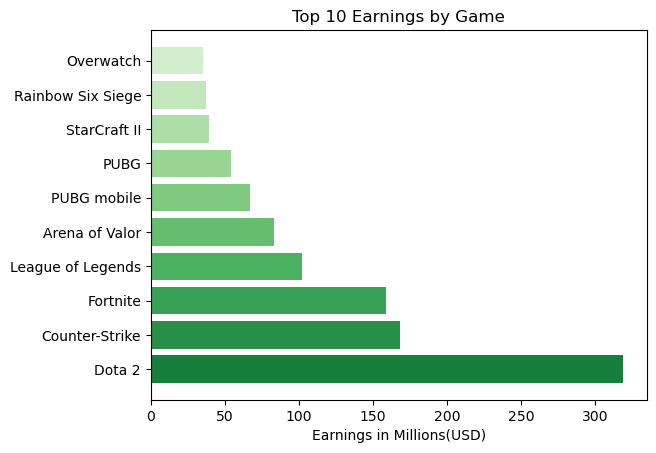

In [23]:
# Creating a horizontal bar chart

cmap = plt.cm.get_cmap('Greens')  
colors = cmap(np.linspace(0.8, 0.2, 10)) 

plt.barh(earning_per_game['Game'].head(10), earning_per_game['Earnings'].head(10), color = colors)
plt.xlabel('Earnings in Millions(USD)')
plt.title('Top 10 Earnings by Game')
plt.show();

The top-earning game is **Dota 2**, which was released in 2013, with total earnings of **$315M.**

It is interesting to note that the top four games on the list have each earned more than **$100M.**

Another interesting insight is that **Fortnite**,the latest game on the list released in 2017, has earned nearly the same as **Counter-Strike**, which was released back in 2000.

Despite its early release, **Counter-Strike** is still very popular game among players.

Ultimately, most of the games on this list were released from **2013** onwards, which show the growth of the esports industry in recent years.

----------

#### 3. Top 10 games earnings in the last 5 years

Next, let's explore the earnings of the top 10 games over the last five years, so we may identify any specific trends or patterns.

In [24]:
# Creating top 10 games list 
top_10 = earning_per_game['Game'].head(10)
print(top_10)

games_earning_pivot['Earnings'] = round(games_earning_pivot['Earnings']/1000000)

0               Dota 2
1       Counter-Strike
2             Fortnite
3    League of Legends
4       Arena of Valor
5          PUBG mobile
6                 PUBG
7         StarCraft II
8    Rainbow Six Siege
9            Overwatch
Name: Game, dtype: object


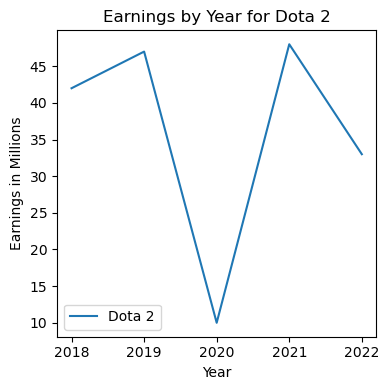

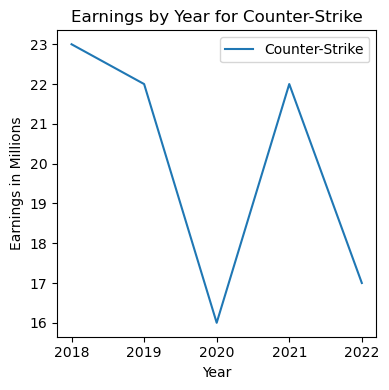

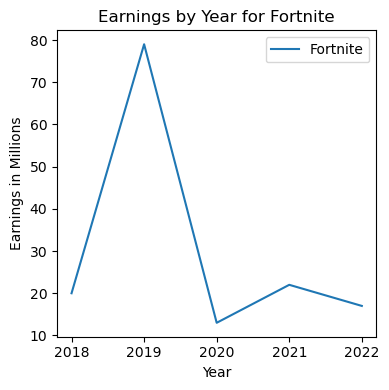

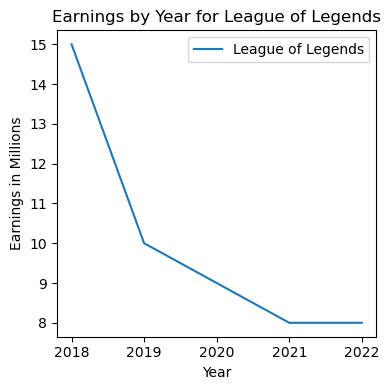

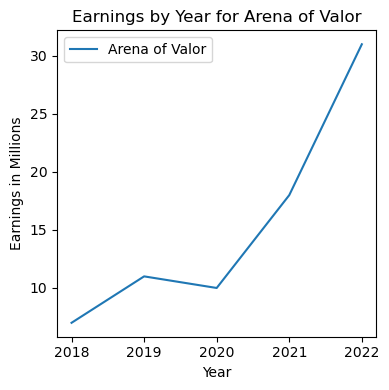

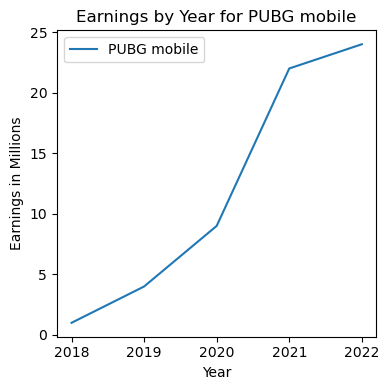

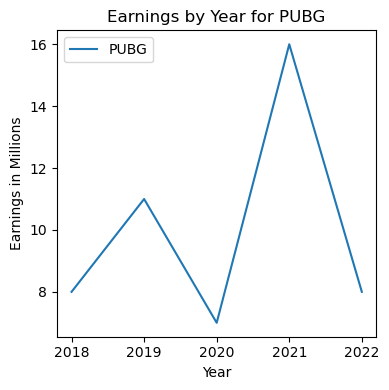

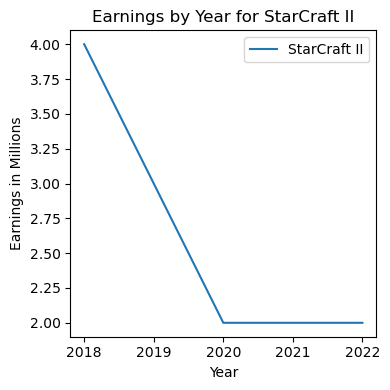

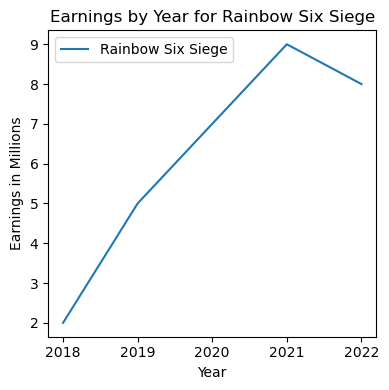

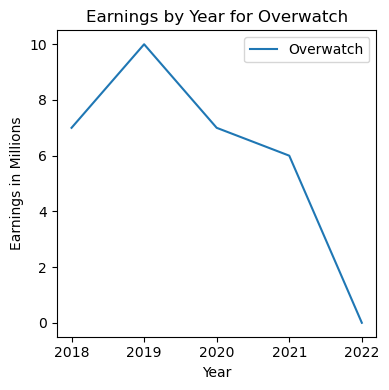

In [25]:
# Loop that select each game from the list in the last 5 years
for game in top_10 : 
    game_last_years = games_earning_pivot[(games_earning_pivot['Game'] == game) & (games_earning_pivot['Year'].between(2018,2022))]
    #print(game_last_years)
    
    fig, ax = plt.subplots(figsize=(4, 4))
    
    plt.plot(game_last_years['Year'], game_last_years['Earnings'], label = game)
    ax.set_xlabel('Year')
    ax.set_ylabel('Earnings in Millions')
    ax.set_title('Earnings by Year for {}'.format(game) )
    ax.legend()

    plt.tight_layout()
    
    plt.show()

The different plots show various trends:


* Most of the games show an **increase from 2018 to the following year 2019.**

* In **2020**, we can see that most of the games earned **less** than the previous years due to **COVID-19.** **The exception is PUBG Mobile**, and it's probably related to the fact that players could still participate in tournaments despite the global pandemic.

* Most of the games show **recovery in 2021**, post-pandemic. Some even reach their **peak earnings (Dota 2, PUBG, Rainbow Six Siege).**

* The games show **differences in 2022** - some continue to **grow (like Arena of Valor), some decline (like Counter-Strike and Fortnite)**, and **some remain stable (like StarCraft II).** With each passing year, new games from different genres offer players bigger prizes and opportunities, contributing to the industry's competition and growth.

* By analyzing the plots **individually**, we can observe that the difference over the **last two years is insignificant, and the top 10 games still earn a lot and control the market.** This may be related to the genre of the game, market competition, releasing new content or updates for the game, and other factors.

--------------

#### 4. Top 10 games tournaments in the last 5 years

Next, let's see how many tournaments each game had in the last 5 years

In [26]:
# Creating a new DataFrame
years_18_22 = pd.DataFrame()

# Loop that select each game from the list in the last 5 years
for game in top_10 :
    tournamnet_per_year = games_earning_pivot[(games_earning_pivot['Game'] == game) & (games_earning_pivot['Year'].between(2018,2022))]
    years_18_22 = pd.concat([years_18_22, tournamnet_per_year])


years_18_22 = years_18_22.sort_values(['Year', 'Game'])
years_18_22.reset_index(inplace=True, drop =True)

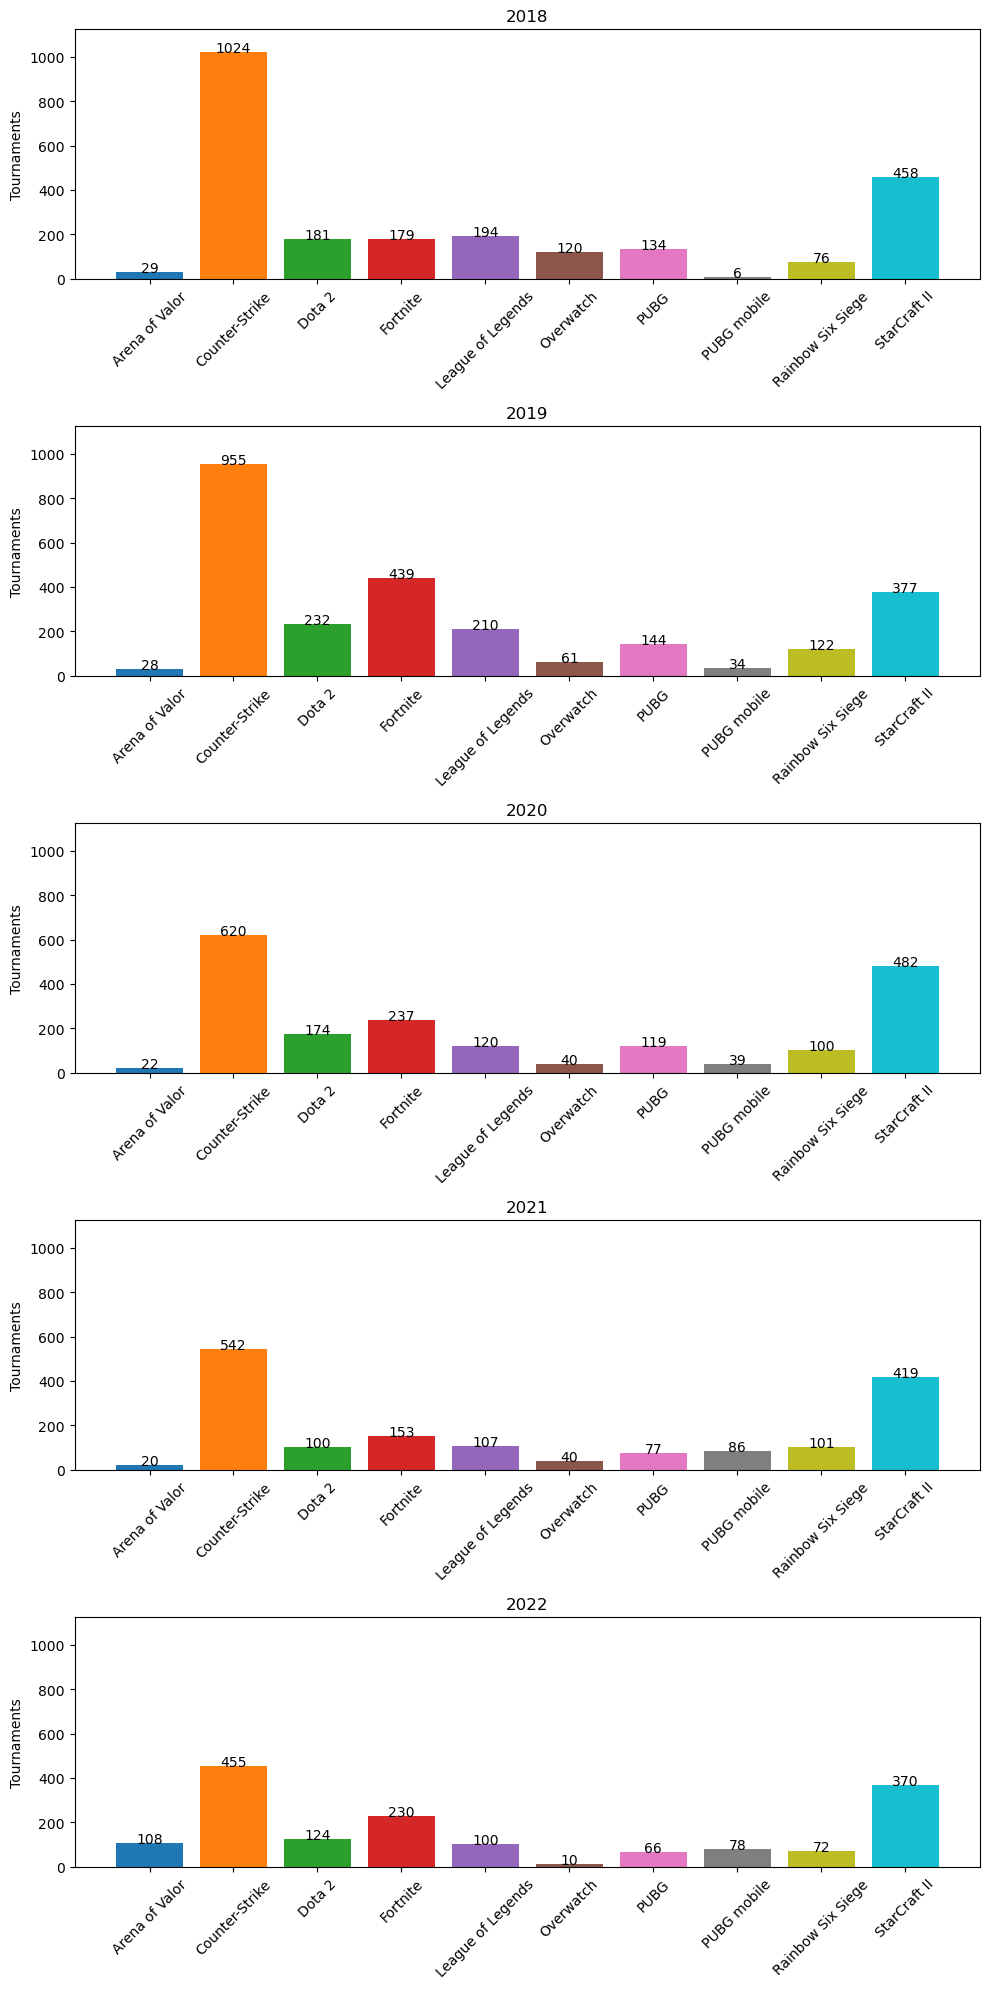

In [27]:
# Define a function to create bar plots 
def create_bar_plots(df):
    years = df['Year'].unique()
    num_years = len(years)
    
    plt.figure(figsize=(10, 20))
    
    color_palette = plt.get_cmap('tab10')  
    max_tournaments = df['Tournaments'].max()
     
    for i, year in enumerate(years):
        plt.subplot(num_years, 1, i+1)
        year_data = df[df['Year'] == year]
        game_names = year_data['Game']
        num_tournaments = year_data['Tournaments']
        width = 0.8
        colors = color_palette(range(len(game_names)))
        
        # Creating the bar plot
        bars = plt.bar(game_names, num_tournaments, width=width, color=colors)
        plt.bar(game_names, num_tournaments, width=width, color=colors)
        plt.ylabel('Tournaments')
        plt.title(str(year))
        plt.xticks(rotation=45)
        plt.ylim(0, max_tournaments+100)
        
        for bar, num in zip(bars, num_tournaments):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), num,
                     ha='center', va='baseline')
        
        
    plt.tight_layout()
    plt.show()
    
create_bar_plots(years_18_22)

From the bar plots we can learn the following trends:


* In **2019, there is a correlation with the earnings line plots.** Most of the games had more tournaments, which correlates with the observation that these games earned more. Additionally, the games that earned less showed a decrease in the number of tournaments.

* In **2020, there is also a correlation with the earnings.** All games, except PUBG Mobile and StarCraft II, showed a **decrease** in the number of tournaments. An interesting insight is that StarCraft II had more tournaments than in 2018, but earned only half the amount.

* Another interesting observation is what happened in **2021.** Although the earnings showed **recovery, most of the games continued to drop in the number of tournaments.** This suggests that the industry, post-pandemic, changed its approach and held fewer tournaments with larger prize pools.

* In 2022, the trend is similar to the previous year. Most games held fewer tournaments, but the earnings didn't show a significant change. This indicates that the prizes per tournament grew, but there were fewer tournaments held overall.

These insights provide valuable information about the relationship between the number of tournaments and earnings in the last years, highlighting the evolving dynamics of the industry.

-----------

#### 5. Total earnings by genre

In [28]:
# Print a list of genres 
print("The number of genres: " + str(games_earning['Genre'].nunique()))
print(games_earning['Genre'].unique())

The number of genres: 12
['FPS' 'Strategy' 'Sports' 'Fighting Game' 'Racing' 'MOBA' 'RPG Game'
 'TPS' 'Music / Rhythm Game' 'Collectible Card Game' 'Puzzle Game'
 'Battle Royale']


In [29]:
# Calculating earnings per genre
earnings_by_genre = games_earning_pivot[['Genre', 'Earnings']].groupby('Genre').sum().sort_values('Earnings', ascending = False)
earnings_by_genre.reset_index(inplace=True)

print(earnings_by_genre)

                    Genre  Earnings
0                    MOBA     563.0
1                     FPS     372.0
2           Battle Royale     311.0
3                Strategy      92.0
4                  Sports      56.0
5   Collectible Card Game      44.0
6           Fighting Game      17.0
7                RPG Game      10.0
8                  Racing       8.0
9                     TPS       6.0
10    Music / Rhythm Game       0.0
11            Puzzle Game       0.0


/tmp/ipykernel_32/15517239.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')


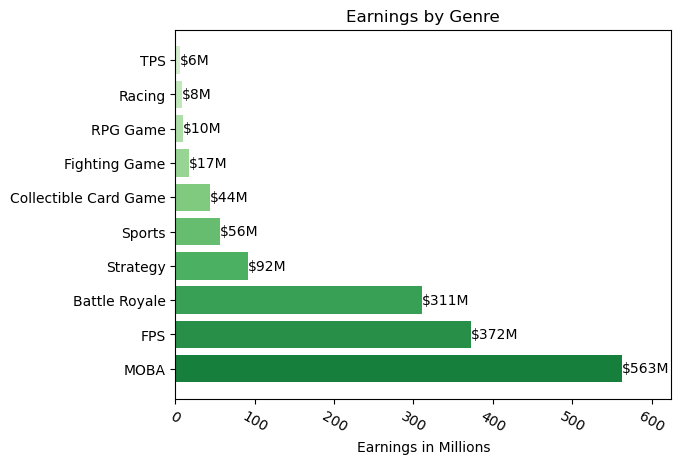

In [30]:
# Creating a horizontal bar chart

cmap = plt.cm.get_cmap('Greens')  
colors = cmap(np.linspace(0.8, 0.2, 10)) 

plt.barh(earnings_by_genre['Genre'].head(10), earnings_by_genre['Earnings'].head(10), color = colors)
plt.xlabel('Earnings in Millions')
plt.title('Earnings by Genre')
plt.xticks(rotation=-30)

for i, (genre, earnings) in enumerate(zip(earnings_by_genre['Genre'].head(10), earnings_by_genre['Earnings'].head(10))):
    plt.text(earnings, i, f"${earnings:.0f}M", ha='left', va='center')

plt.xlim(0, earnings_by_genre['Earnings'].head(10).max() * 1.11)
plt.show();

The genre earning the most in total is **MOBA (Multiplayer Online Battle Arena), with a total of $555M**. The top games in this genre include Dota 2, League of Legends, and Arena of Valor.

Following that, the **FPS (First-Person Shooter) genre ranks second with a total of $356M**. Popular games in this genre are Counter-Strike, Rainbow Six Siege, and Overwatch.

The **Battle Royale genre secures the third position with a total of $303M**, featuring games like Fortnite, PUBG, and PUBG Mobile.

It is apparent that all of the top 10 games in terms of earnings belong to these leading genres, highlighting the correlation between genre popularity and earnings.

-----------

#### 6. Tournaments by genre

In [31]:
# Calculating total tournaments by genre
tournaments_by_genre = games_earning_pivot[['Genre', 'Tournaments']].groupby('Genre').sum().sort_values('Tournaments', ascending = False)
tournaments_by_genre.reset_index(inplace=True)
print(tournaments_by_genre)

                    Genre  Tournaments
0                     FPS        15293
1                Strategy        13866
2           Fighting Game        10640
3                    MOBA         6470
4                  Sports         4496
5           Battle Royale         3002
6   Collectible Card Game         1842
7                  Racing         1807
8                RPG Game          303
9                     TPS          278
10    Music / Rhythm Game          193
11            Puzzle Game           97


/tmp/ipykernel_32/631735704.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('GnBu')


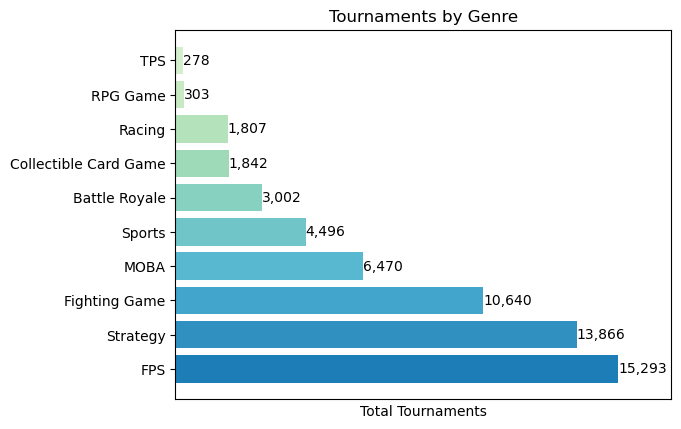

In [32]:
# Creating a horizontal bar chart

cmap = plt.cm.get_cmap('GnBu') 
colors = cmap(np.linspace(0.8, 0.2, 10)) 

plt.barh(tournaments_by_genre['Genre'].head(10) ,tournaments_by_genre['Tournaments'].head(10), color = colors)
plt.xlabel('Total Tournaments')
plt.title('Tournaments by Genre')
for i, (genre, Tournaments) in enumerate(zip(tournaments_by_genre['Genre'].head(10), tournaments_by_genre['Tournaments'].head(10))):
    formatted_tournaments = '{:,}'.format(Tournaments)
    plt.text(Tournaments, i, f"{formatted_tournaments}", ha='left', va='center')

plt.xlim(0, tournaments_by_genre['Tournaments'].head(10).max() * 1.12)
plt.xticks([])

plt.show()

**FPS (First-Person Shooter) is the genre with the highest number of tournaments held**. This can be attributed to its status as an old and established genre, with games like Counter-Strike released back in 2000.


**Strategy and Fighting-game genres have a high number of tournaments held but low earnings.** This suggests that, apart from StarCraft II in the Strategy genre, the prize pools per tournament in these genres may be lower than in others.


**MOBA (Multiplayer Online Battle Arena) genre holds the fourth position in terms of tournaments held but leads in earnings.** This can indicate that higher prize pools per tournament offered in this genre.


An interesting insight is that **Battle Royale genre, which held four times fewer tournamnets than FPS, earned almost the same amount.This genre gained popularity relatively late, with its popular games being released around 2017.**


Surprisingly, **the Sports genre secures a spot in the top five**, implying a genre with high number of tournaments but likely with smaller prize pools.

----

#### 7. Earning by genre in the last 5 years

In [33]:
# Creating top 5 genres list
top_genres = tournaments_by_genre['Genre'].head(5)  

# Calculating genres' earnings per year
genre_by_year = games_earning_pivot[(games_earning_pivot['Year'] >= 2018) & (games_earning_pivot['Year'] <= 2022) & (games_earning_pivot['Genre'].isin(top_genres))].groupby(['Genre', 'Year'])['Earnings'].sum().reset_index()
print(genre_by_year)

            Genre  Year  Earnings
0             FPS  2018      42.0
1             FPS  2019      46.0
2             FPS  2020      46.0
3             FPS  2021      63.0
4             FPS  2022      56.0
5   Fighting Game  2018       1.0
6   Fighting Game  2019       4.0
7   Fighting Game  2020       1.0
8   Fighting Game  2021       2.0
9   Fighting Game  2022       1.0
10           MOBA  2018      71.0
11           MOBA  2019      69.0
12           MOBA  2020      30.0
13           MOBA  2021      81.0
14           MOBA  2022      90.0
15         Sports  2018       7.0
16         Sports  2019       8.0
17         Sports  2020       7.0
18         Sports  2021       8.0
19         Sports  2022      15.0
20       Strategy  2018       5.0
21       Strategy  2019       6.0
22       Strategy  2020      10.0
23       Strategy  2021      13.0
24       Strategy  2022      15.0


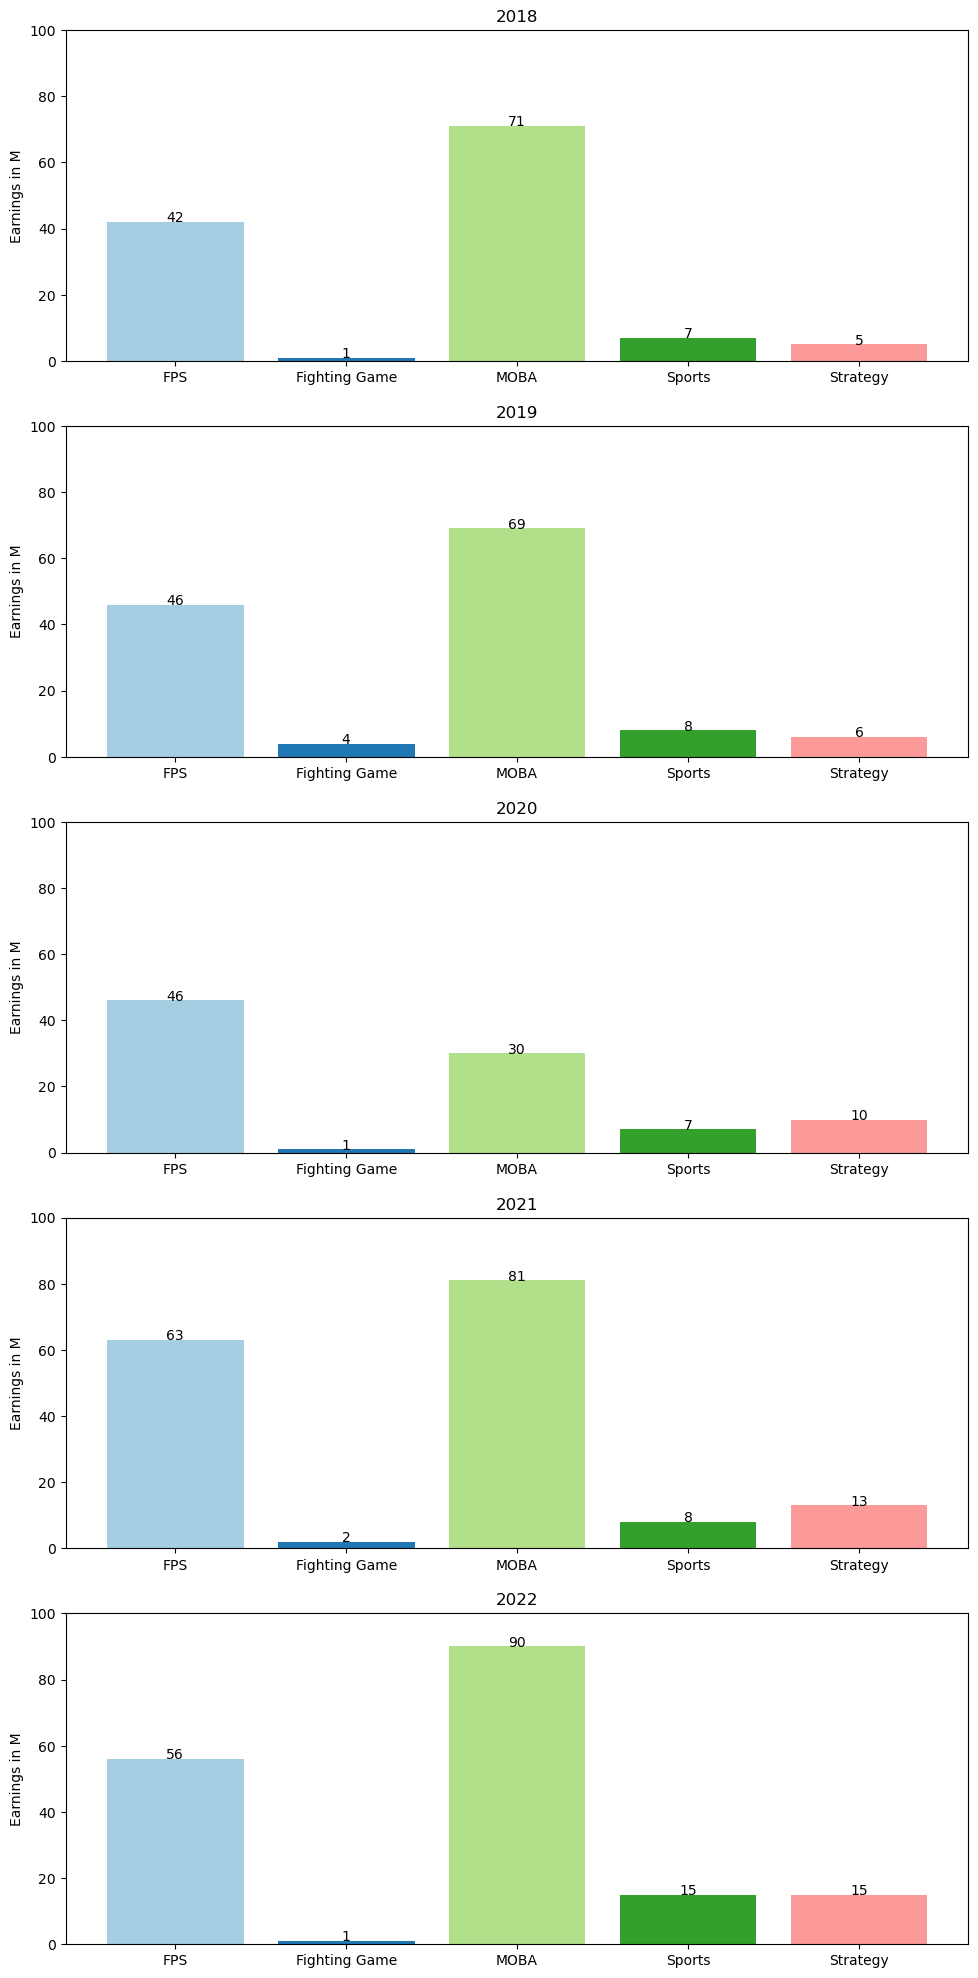

In [34]:
# Define a function to create bar plots
def year_bar_plots(df):
    years = df['Year'].unique()
    num_years = len(years)
    
    plt.figure(figsize=(10, 20))
    
    color_palette = plt.get_cmap('Paired')  
    max_earnings = df['Earnings'].max()
    
    for i, year in enumerate(years):
        plt.subplot(num_years, 1, i+1)
        year_data = df[df['Year'] == year]
        genre_names = year_data['Genre']
        earnings = year_data['Earnings']
        width = 0.8
        colors = color_palette(range(len(genre_names)))
        
        # Creating the bar plot
        bars = plt.bar(genre_names, earnings, width=width, color=colors)
        plt.bar(genre_names, earnings, width=width, color=colors)
        plt.ylabel('Earnings in M')
        plt.title(str(year))
        plt.xticks(rotation=0)
        
        for bar, num in zip(bars, earnings):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(num),
                     ha='center', va='baseline')
            plt.ylim(0, max_earnings+10)
  
    plt.tight_layout(pad=1.5)
    plt.show()
    
year_bar_plots(genre_by_year)

From the bar plots we can learn the following insights:

**MOBA, Sports, and strategy** show an increase in earnings, reaching their highest earnings in 2022.

**FPS genre show consistent growth from 2018 to 2021 but a slight decrease in 2022.**
However, the difference is relatively small as this genre still earned considerably more than most others.

**Fighting-Game genre show no clear trend, with earnings Shifting between higher and lower values.** The genre reached its peak earnings in 2019, and in 2022 it remained the same as in 2018.

---------

## Conclusion

In conclusion, the research findings demonstrate a noteworthy upsurge in the Esports industry, garnering global interest. The comprehensive analysis conducted over the past five years has yielded invaluable insights into the interplay between genres, tournaments, and earnings within the sector.

The data has unveiled compelling trends, particularly highlighting the prevalence of specific games and genres in generating higher earnings, as well as the fluctuating frequency of organized tournaments. These observations offer significant implications for stakeholders in the Esports industry, game developers, and enthusiasts alike.

Given the comprehensive nature of this project, it is anticipated to serve as a valuable resource for various stakeholders, providing a thorough overview of the Esports economy and its evolving trends. Its in-depth analysis has the potential to inform strategic decision-making, spur innovation, and stimulate further growth within this dynamic and rapidly expanding domain.

--------------